In [1]:
jupyter notebook list


SyntaxError: invalid syntax (<ipython-input-1-46cbd787b5a9>, line 1)

In [45]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the conf of the plots we will create

pd.options.mode.chained_assignment = None


# Read in the data

df = pd.read_csv(r'C:\Users\Brian Andeson\Downloads\movies.csv')


In [3]:
# Let's look at the data 

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [5]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
# Change data type of columns

df = df.fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')


In [53]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [55]:
# Create correct year column

df['yearcorrect'] = df['released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


In [58]:
df = df.sort_values(by = ['gross'], inplace = False, ascending = False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8


In [18]:
pd.set_option('display.max_rows', None) # displays all the data

In [59]:
# Drop any duplicates

df.drop_duplicates()

df.head()





,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000.0,2.847246e+09,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000.0,2.797501e+09,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000.0,2.201647e+09,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000.0,2.069522e+09,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000.0,2.048360e+09,1606,149.0,8


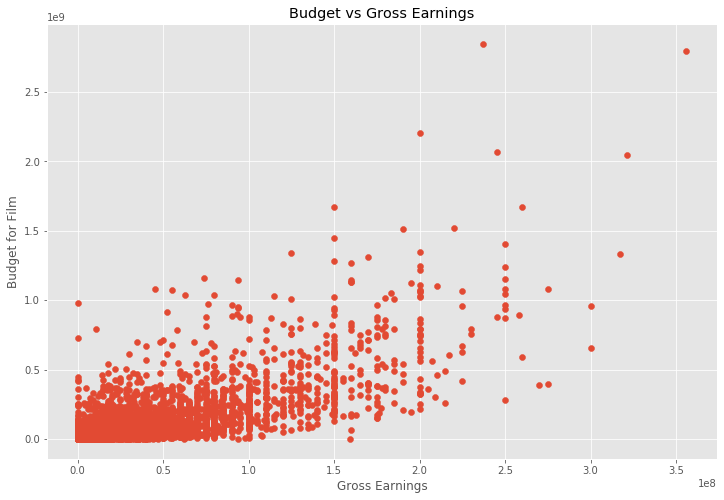

In [24]:
# Scatter plot with budget vs gross 

plt.scatter(x = df['budget'], y = df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()






In [23]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


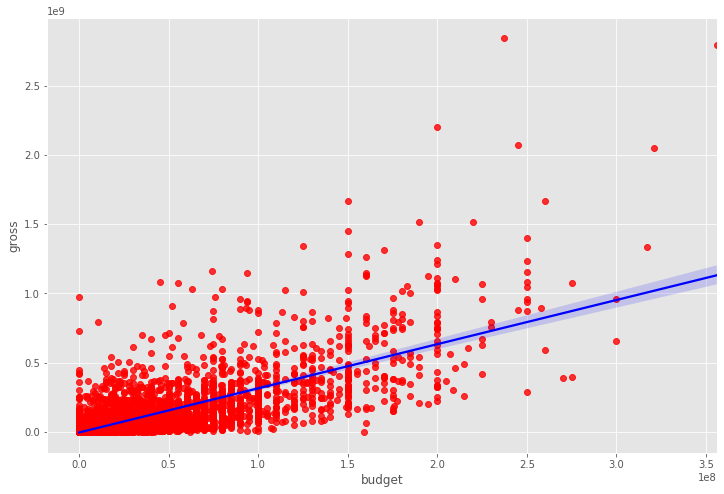

In [28]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color": "red"}, line_kws={"color":"blue"})

In [33]:
# Let's start looking at correlation

df.corr(method = 'pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000


In [ ]:
# high correlation between budget and gross


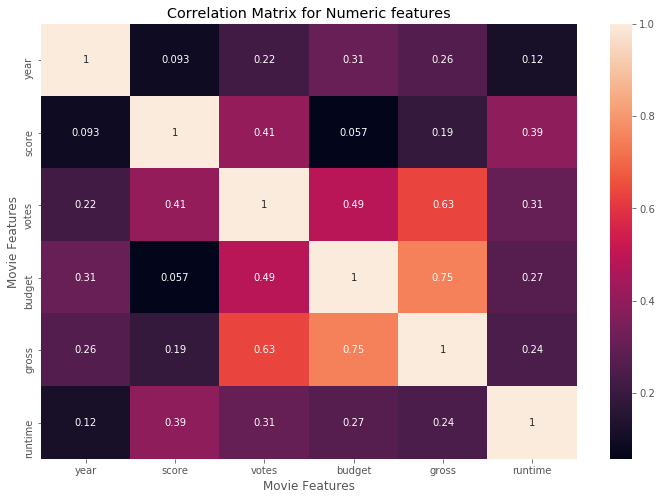

In [36]:
# In order to visualize the correlation we do correlation matrix

correlation_matrix = df.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [37]:
# Look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,July


In [40]:
df_numerized = df


In [57]:


df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()


        


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,14
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,13
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,14
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,13
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,13


In [56]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,June
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,June
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,July
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,July


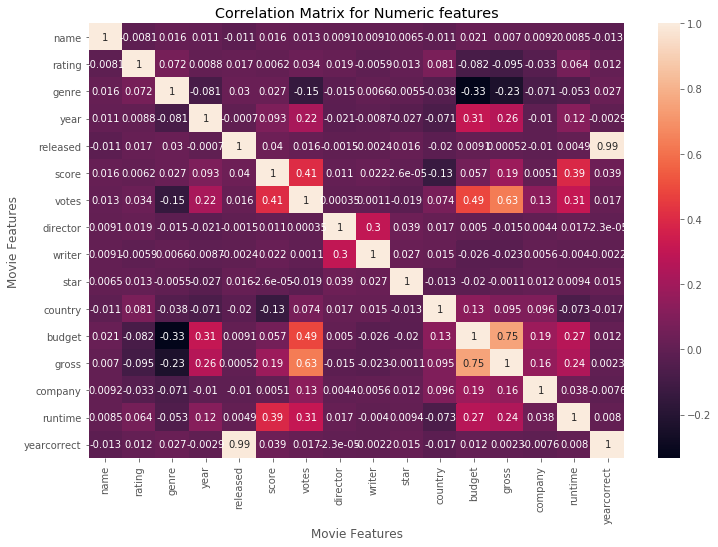

In [48]:
correlation_matrix = df_numerized.corr(method ='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [49]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.008483,-0.013132
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.064133,0.012429
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052914,0.027305
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.116358,-0.002885
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.000519,-0.010474,0.004852,0.994590
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.186012,0.005081,0.394564,0.038923
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.632870,0.133457,0.306984,0.016978
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017062,-0.000023
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.004036,-0.002235
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.009418,0.015330


In [50]:
# See the highest correlation quickly

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.016377
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.008483
             yearcorrect   -0.013132
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score          0.006192
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [51]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.334021
genre        budget        -0.334021
gross        genre         -0.234297
genre        gross         -0.234297
votes        genre         -0.145296
genre        votes         -0.145296
country      score         -0.133346
score        country       -0.133346
rating       gross         -0.095450
gross        rating        -0.095450
budget       rating        -0.081939
rating       budget        -0.081939
year         genre         -0.081261
genre        year          -0.081261
runtime      country       -0.073319
country      runtime       -0.073319
company      genre         -0.071067
genre        company       -0.071067
country      year          -0.070938
year         country       -0.070938
genre        runtime       -0.052914
runtime      genre         -0.052914
genre        country       -0.037615
country      genre         -0.037615
company      rating        -0.032943
rating       company       -0.032943
star         year          -0.027242
y

In [52]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross        votes          0.632870
votes        gross          0.632870
budget       gross          0.750157
gross        budget         0.750157
yearcorrect  released       0.994590
released     yearcorrect    0.994590
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation